# Stima della pandemia di COVID-19

## Caricamento dei dati

Utilizzeremo i dati relativi agli individui infetti da COVID-19, forniti dal [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) della [Johns Hopkins University](https://jhu.edu/). Il dataset è disponibile in [questo repository GitHub](https://github.com/CSSEGISandData/COVID-19).


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

Possiamo caricare i dati più recenti direttamente da GitHub utilizzando `pd.read_csv`. Se per qualche motivo i dati non sono disponibili, puoi sempre utilizzare la copia disponibile localmente nella cartella `data` - basta rimuovere il commento dalla riga qui sotto che definisce `base_url`:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

Possiamo vedere che ogni riga della tabella definisce il numero di individui infetti per ogni paese e/o provincia, e le colonne corrispondono alle date. Tabelle simili possono essere caricate per altri dati, come il numero di guariti e il numero di decessi.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## Comprendere i dati

Dalla tabella sopra, il ruolo della colonna provincia non è chiaro. Vediamo i diversi valori presenti nella colonna `Province/State`:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## Pre-elaborazione dei dati

Non siamo interessati a suddividere i paesi in ulteriori territori, quindi per prima cosa elimineremo questa suddivisione e aggiungeremo le informazioni di tutti i territori insieme, per ottenere i dati per l'intero paese. Questo può essere fatto utilizzando `groupby`:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

Puoi vedere che, grazie all'utilizzo di `groupby`, tutti i DataFrame sono ora indicizzati per Paese/Regione. Possiamo quindi accedere ai dati per un paese specifico utilizzando `.loc`:|


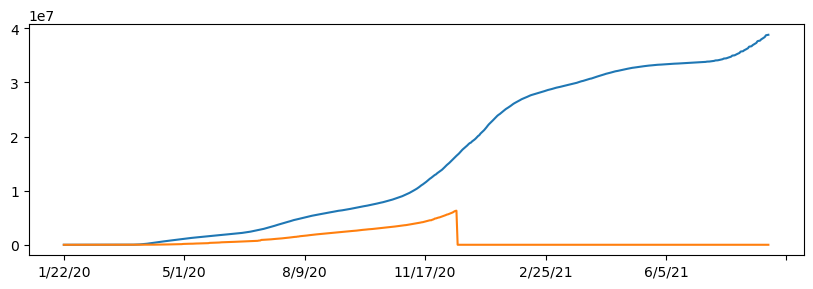

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **Nota** come utilizziamo `[2:]` per rimuovere i primi due elementi di una sequenza che contengono la geolocalizzazione di un paese. Possiamo anche eliminare completamente quelle due colonne:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## Indagare sui dati

Passiamo ora a esaminare un paese specifico. Creiamo un frame che contenga i dati sulle infezioni indicizzati per data:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

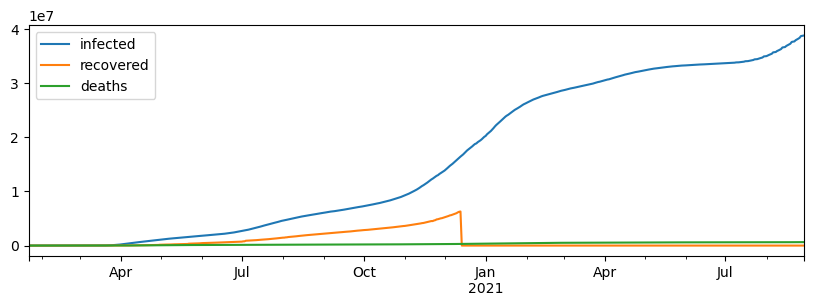

In [134]:
df.plot()
plt.show()

Ora calcoliamo il numero di nuove persone infette ogni giorno. Questo ci permetterà di vedere la velocità con cui la pandemia progredisce. Il modo più semplice per farlo è utilizzare `diff`:


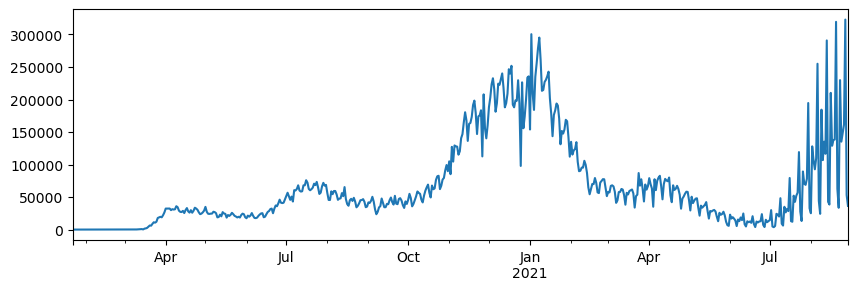

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

Possiamo vedere grandi fluttuazioni nei dati. Diamo un'occhiata più da vicino a uno dei mesi:


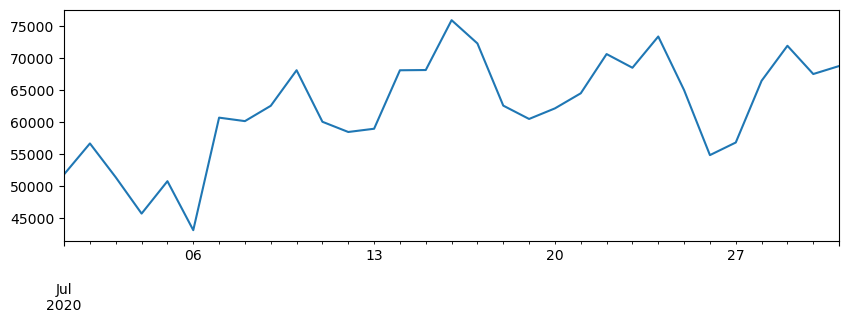

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

Sembra chiaramente che ci siano fluttuazioni settimanali nei dati. Poiché vogliamo essere in grado di vedere le tendenze, ha senso appianare la curva calcolando la media mobile (cioè, per ogni giorno calcoleremo il valore medio dei giorni precedenti):


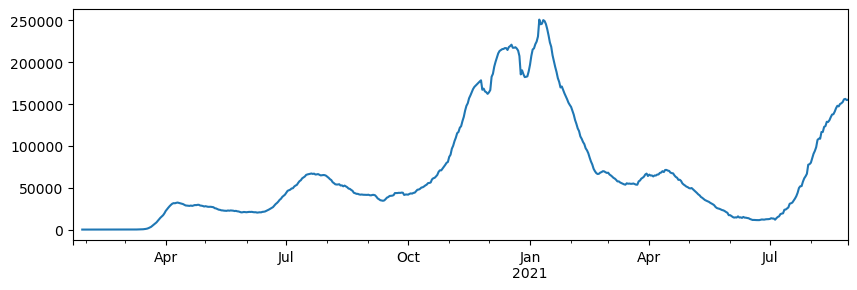

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

Per poter confrontare diversi paesi, potremmo voler tenere conto della popolazione del paese e confrontare la percentuale di individui infetti rispetto alla popolazione del paese. Per ottenere la popolazione del paese, carichiamo il dataset dei paesi:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

Poiché questo dataset contiene informazioni sia sui paesi che sulle province, per ottenere la popolazione dell'intero paese dobbiamo essere un po' più astuti:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

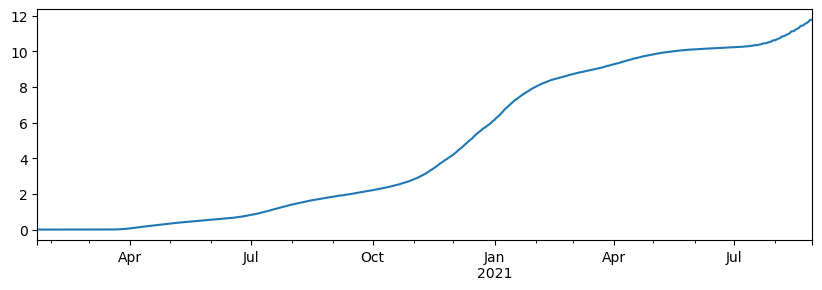

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## Calcolo di $R_t$

Per capire quanto è contagiosa la malattia, consideriamo il **numero di riproduzione di base** $R_0$, che indica il numero di persone che un individuo infetto potrebbe ulteriormente contagiare. Quando $R_0$ è maggiore di 1, è probabile che l'epidemia si diffonda.

$R_0$ è una proprietà intrinseca della malattia e non tiene conto di alcune misure protettive che le persone possono adottare per rallentare la pandemia. Durante il progresso della pandemia, possiamo stimare il numero di riproduzione $R_t$ in un dato momento $t$. È stato dimostrato che questo numero può essere approssimativamente stimato prendendo una finestra di 8 giorni e calcolando $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
dove $I_t$ è il numero di nuovi individui infetti nel giorno $t$.

Calcoliamo $R_t$ per i nostri dati relativi alla pandemia. Per fare ciò, prenderemo una finestra mobile di 8 valori di `ninfected` e applicheremo la funzione per calcolare il rapporto sopra descritto:


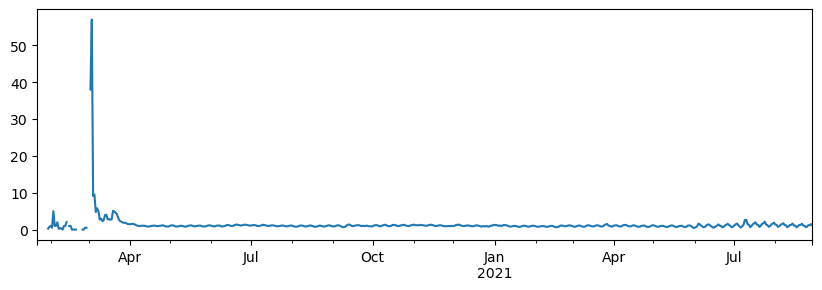

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

Puoi notare che ci sono alcune lacune nel grafico. Queste possono essere causate da valori `NaN` o `inf` presenti nel dataset. I valori `inf` possono derivare da una divisione per 0, mentre i valori `NaN` possono indicare dati mancanti o l'assenza di dati disponibili per calcolare il risultato (come all'inizio del nostro frame, dove la finestra mobile di larghezza 8 non è ancora disponibile). Per rendere il grafico più chiaro, dobbiamo riempire questi valori utilizzando le funzioni `replace` e `fillna`.

Esaminiamo ulteriormente l'inizio della pandemia. Limiteremo anche i valori dell'asse y per mostrare solo quelli inferiori a 6, in modo da avere una visualizzazione più chiara, e tracceremo una linea orizzontale al valore 1.


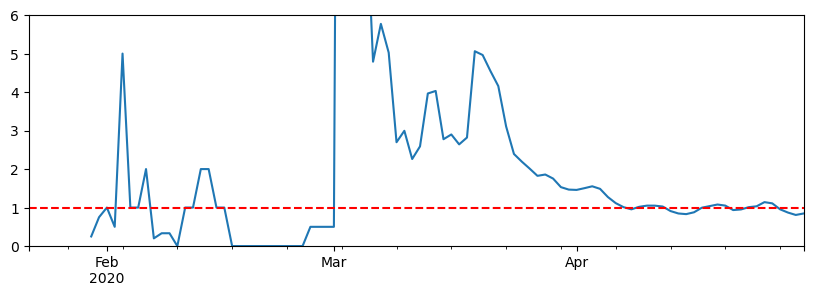

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

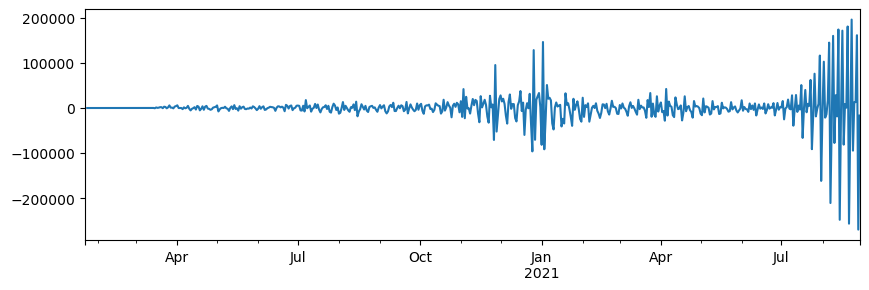

In [143]:
df['ninfected'].diff().plot()
plt.show()

Dato il fatto che ci sono molte fluttuazioni nei dati causate dalla segnalazione, ha senso appianare la curva calcolando la media mobile per ottenere una visione d'insieme. Concentriamoci di nuovo sui primi mesi della pandemia:


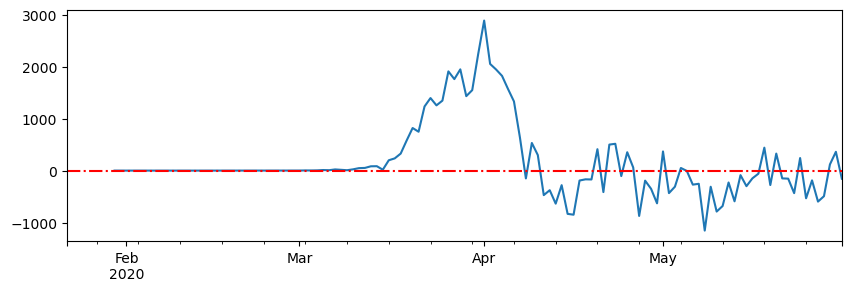

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## Sfida

Ora è il momento di giocare di più con il codice e i dati! Ecco alcune idee che puoi sperimentare:
* Osserva la diffusione della pandemia in diversi paesi.
* Traccia i grafici di $R_t$ per diversi paesi su un unico grafico per confronto, oppure crea più grafici affiancati.
* Analizza come il numero di decessi e guarigioni si correlano con il numero di casi di infezione.
* Cerca di scoprire quanto dura tipicamente una malattia correlando visivamente il tasso di infezione e il tasso di decessi, cercando eventuali anomalie. Potresti dover esaminare diversi paesi per scoprirlo.
* Calcola il tasso di mortalità e come cambia nel tempo. Potresti voler considerare la durata della malattia in giorni per spostare una serie temporale prima di effettuare i calcoli.


## Riferimenti

Puoi approfondire gli studi sulla diffusione dell'epidemia di COVID nelle seguenti pubblicazioni:
* [Sliding SIR Model for Rt Estimation during COVID Pandemic](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), articolo sul blog di [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [Estimation of Time-Dependent Reproduction Number for Global COVID-19 Outbreak](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Codice per il suddetto articolo su GitHub](https://github.com/shwars/SlidingSIR)



---

**Disclaimer**:  
Questo documento è stato tradotto utilizzando il servizio di traduzione automatica [Co-op Translator](https://github.com/Azure/co-op-translator). Sebbene ci impegniamo per garantire l'accuratezza, si prega di notare che le traduzioni automatiche possono contenere errori o imprecisioni. Il documento originale nella sua lingua nativa dovrebbe essere considerato la fonte autorevole. Per informazioni critiche, si raccomanda una traduzione professionale effettuata da un esperto umano. Non siamo responsabili per eventuali incomprensioni o interpretazioni errate derivanti dall'uso di questa traduzione.
